<a href="https://colab.research.google.com/github/Sairam7203/NeuralNetworks/blob/main/SaiRam_700764024_HA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

# Define the 5×5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Define the 3×3 kernel
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=np.float32)

# Reshape input and kernel to match Conv2D expected dimensions
input_tensor = input_matrix.reshape(1, 5, 5, 1)  # (batch, height, width, channels)
kernel_tensor = kernel.reshape(3, 3, 1, 1)  # (height, width, in_channels, out_channels)

# Function to perform convolution using TensorFlow
def apply_convolution(stride, padding):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), strides=stride, padding=padding,
               kernel_initializer=tf.constant_initializer(kernel_tensor), use_bias=False,
               input_shape=(5, 5, 1))
    ])
    output = model.predict(input_tensor)
    return output.squeeze()  # Remove single batch and channel dimensions

# Perform convolution operations
output_valid_1 = apply_convolution(stride=1, padding='valid')
output_same_1 = apply_convolution(stride=1, padding='same')
output_valid_2 = apply_convolution(stride=2, padding='valid')
output_same_2 = apply_convolution(stride=2, padding='same')

# Print results
print("Output (Stride=1, Padding='VALID'):\n", output_valid_1)
print("\nOutput (Stride=1, Padding='SAME'):\n", output_same_1)
print("\nOutput (Stride=2, Padding='VALID'):\n", output_valid_2)
print("\nOutput (Stride=2, Padding='SAME'):\n", output_same_2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Output (Stride=1, Padding='VALID'):
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Output (Stride=1, Padding='SAME'):
 [[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Output (Stride=2, Padding='VALID'):
 [[0. 0.]
 [0. 0.]]

Output (Stride=2, Padding='SAME'):
 [[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


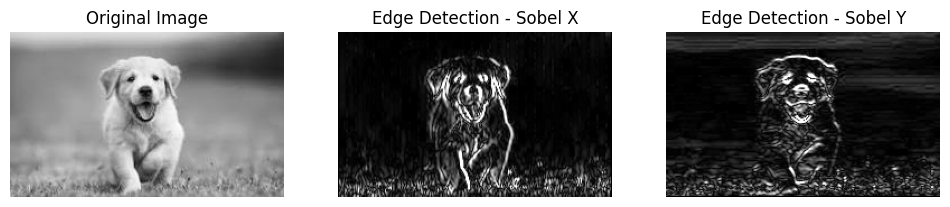

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image_path = "/content/download.jpg"  # Change if using a different image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel-X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel-Y

# Convert to absolute values and scale
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Display images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Edge Detection - Sobel X")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Edge Detection - Sobel Y")
plt.axis("off")

plt.show()


In [3]:
import tensorflow as tf
import numpy as np

# Create a random 4x4 matrix
np.random.seed(42)
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32)  # Convert to float32

# Define pooling layers
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)

# Apply pooling
max_pooled = max_pool(input_matrix).numpy().squeeze()
avg_pooled = avg_pool(input_matrix).numpy().squeeze()

# Print results
print("\nOriginal 4x4 Matrix:\n", input_matrix.squeeze())
print("\nMax-Pooled (2x2) Matrix:\n", max_pooled)
print("\nAverage-Pooled (2x2) Matrix:\n", avg_pooled)



Original 4x4 Matrix:
 [[6. 3. 7. 4.]
 [6. 9. 2. 6.]
 [7. 4. 3. 7.]
 [7. 2. 5. 4.]]

Max-Pooled (2x2) Matrix:
 [[9. 7.]
 [7. 7.]]

Average-Pooled (2x2) Matrix:
 [[6.   4.75]
 [5.   4.75]]


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define AlexNet model
def alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (11,11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        layers.MaxPooling2D((3,3), strides=2),

        layers.Conv2D(256, (5,5), activation='relu', padding='same'),
        layers.MaxPooling2D((3,3), strides=2),

        layers.Conv2D(384, (3,3), activation='relu', padding='same'),
        layers.Conv2D(384, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((3,3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # Output for 10 classes
    ])

    return model

# Create and print model summary
alexnet_model = alexnet()
alexnet_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras import Input, Model

# Define a Residual Block
def residual_block(input_tensor, filters=64):
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(input_tensor)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)
    x = layers.Add()([x, input_tensor])  # Skip Connection
    x = layers.Activation('relu')(x)
    return x

# Define a ResNet-like model
def resnet_like():
    input_layer = Input(shape=(224, 224, 3))

    x = layers.Conv2D(64, (7,7), strides=2, activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((3,3), strides=2)(x)

    x = residual_block(x)
    x = residual_block(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)  # Output for 10 classes

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create and print model summary
resnet_model = resnet_like()
resnet_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 55, 55, 64)     │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 55, 55, 64)     │         36,928 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 55, 55, 64)     │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 55, 55, 64)     │              0 │ conv2d_11[0][0],       │
│                           │                        │                │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 55, 55, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 55, 55, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 55, 55, 64)     │         36,928 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 55, 55, 64)     │              0 │ conv2d_13[0][0],       │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 55, 55, 64)     │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 193600)         │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │     24,780,928 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,939,402 (95.14 MB)

 Trainable params: 24,939,402 (95.14 MB)

 Non-trainable params: 0 (0.00 B)